In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams

In [2]:
config={
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.size":10,
    'axes.unicode_minus':False
}
rcParams.update(config)

In [3]:
path = 'D:/machine learning data/liner regress/regress_data1.csv'
import pandas as pd
data = pd.read_csv(path)
data.head()

,人口,收益
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
rows=data.shape[0]
cols=data.shape[1]
#选出特征矩阵
X_data=data.iloc[:,:cols-1]
#选出目标向量
y_data=data.iloc[:,cols-1:]

In [5]:
#进行数据分离
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.2,random_state=27)

In [6]:
data.describe()

,人口,收益
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


观察到数据中有离群点，故采用Data standardization方法进行数据预处理
$$x^*=\frac{x-\mu}\sigma $$
其中：
$$\sigma^{2} =\frac1m\sum_{i=1}^m\left(x^{(i)}\right)^2 $$ 
$$\mu=\frac1m\sum_{i=1}^mx^{(i)}$$

In [7]:
mu=np.mean(X_train,axis=0)
sigma=np.std(X_train,axis=0)
normalized_X_train=(X_train-mu)/sigma
normalized_data=pd.concat([normalized_X_train,y_train],axis=1)
normalized_X_test=(X_test-mu)/sigma

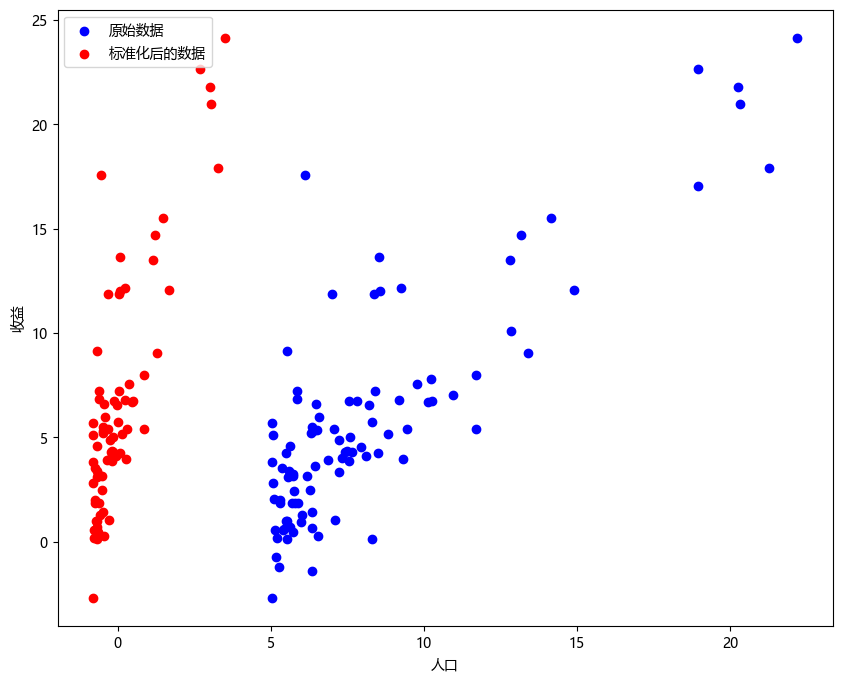

In [8]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc("font",family='Microsoft YaHei')


plt.figure(figsize=(10,8))
# 绘制原始数据散点图
plt.scatter(data['人口'], data['收益'], label='原始数据', color='blue')

# 绘制标准化后的数据散点图
plt.scatter(normalized_data['人口'], normalized_data['收益'], label='标准化后的数据', color='red')

# 设置坐标轴标签和图例
plt.xlabel('人口')
plt.ylabel('收益')
plt.legend()

# 显示图形
plt.show()


可以明显看出，标准化后的均值在0附近，数据的分布范围缩小，但是数据的分布形状仍保持不变

正则化

减少过度拟合的一个好办法就是对模型正则化（即约束它）：它拥有的自由度越低，就越不容易过度拟合数据。

对线性模型来说，正则化通常通过约束模型的权重来实现。常见的对权重进行约束的方法有：岭回归（Ridge Regression）、套索回归（lasso Regression）及弹性网络（Elastic Regression）

因此，我们修改代价函数为：
$$J(w)=\frac{1}{2 m} \sum_{i=1}^{m}\left(f\left(x^{(i)}\right)-y^{(i)}\right)^{2}+\frac{\lambda}{2 m} \sum_{j=1}^{n} w_{j}^{2}$$

In [9]:
#添加偏置项
normalized_X_train.insert(0, 'Ones', 1)
normalized_X_test.insert(0, 'Ones', 1)
normalized_X_train

,Ones,人口
45,1,-0.298532
41,1,-0.351511
88,1,-0.694165
83,1,0.374550
20,1,-0.525945
...,...,...
95,1,1.286540
31,1,-0.425244
72,1,-0.571956
56,1,-0.504537


In [10]:
X=normalized_X_train.values
Y=y_train.values
W=np.array([[0.0],[0.0]])

In [11]:
(X.shape,Y.shape,W.shape)

((77, 2), (77, 1), (2, 1))

根据维度，易知线性回归模型为：
$$f\left(X\right)=XW$$

因此，我们定义模型的损失函数为：
$$loss=\frac{1}{2m}\sum_{n=1}^N\left(y(x_n,w)-t_n\right)^2+{\frac{\lambda}{2m}\|w\|_2^2}$$
其中：
$$||\mathrm{w}||_2=(\sum_{\mathrm{i}=1}^\mathrm{n}|\mathrm{x}_1|^2)^{\frac12}$$



又知，梯度下降公式为：
$$w=w-\alpha\cdot\frac{\partial J(w)}{\partial w}$$
其中:
$$\frac{\partial J(w)}{\partial w}=\left(f{\left(x^{(i)}\right)}-y^{(i)}\right)x_j^{(i)}+\lambda w$$



In [21]:
def computeCost(X,Y,W,lambad):
    Y_hat=np.dot(X,W)
    loss=np.sum((Y_hat-Y)**2)/(2*X.shape[0])+lambad/(2*X.shape[0])*np.sum(W[-1]**2)
    return loss
  
def gradientDescent(X,Y,W,alpha,lambad):
    num_train=X.shape[0]
    Y_hat=np.dot(X,W)
    dW=np.dot(X[:,1:].T,(Y_hat-Y)) / num_train + lambad* W[-1]
    db = (1 /num_train ) * np.sum(Y_hat - Y)
    W+= -alpha * dW
    W[0]+=-alpha*db
    
    return W
    
def LinearRegression(X,Y,alpha,iters):
    loss_his=[] #初始化模型参数
    W_his=[]
    feature_dim=X.shape[1]
    W=np.zeros((feature_dim,1))
    for i in range(iters):
        loss=computeCost(X,Y,W,0.001)
        loss_his.append(loss)
        W=gradientDescent(X,Y,W,alpha,0.001)
        t=W.copy()
        W_his.append(t)
        
    return loss_his,W_his


def predict(X,W):
    y_pre=np.dot(X,W)
    return y_pre

In [22]:
#进行模型训练
alpha=0.001
iters=10000
loss_his,W_his=LinearRegression(X,Y,alpha,iters)

接下来，使用最小二乘法更新模型参数

In [27]:
w=np.linalg.inv(X.T@X)@X.T@Y
y_pre=predict(normalized_X_test,w)

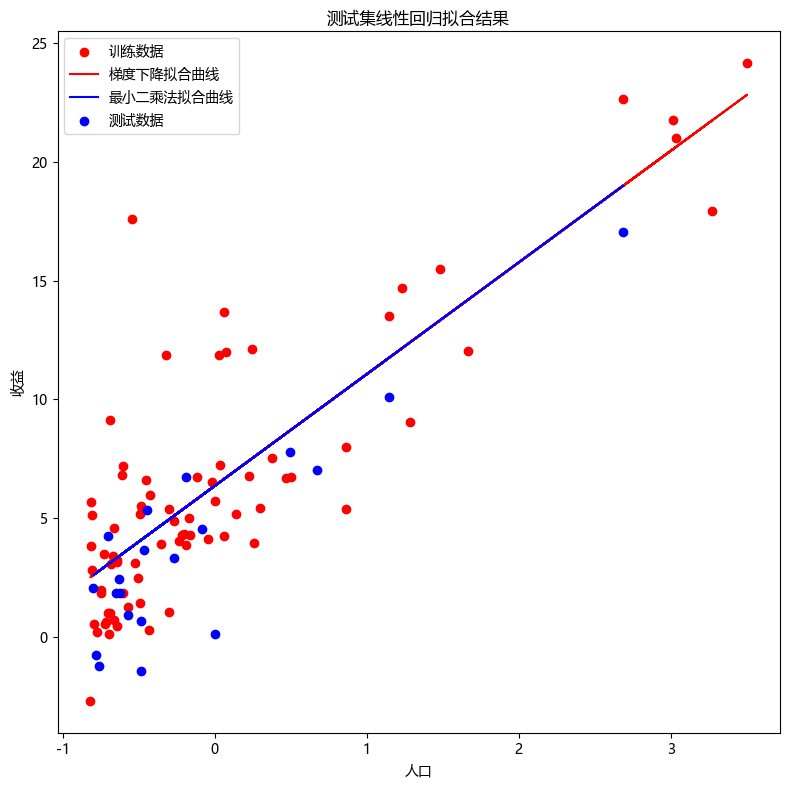

In [29]:
# 获取训练数据的特征值和目标值
X_train_values = normalized_X_train['人口'].values
y_train_values = y_train.values
X_test_values = normalized_X_test['人口'].values
y_test_values = y_test.values

# 使用训练好的模型参数对训练数据进行预测
predicted_y_train = np.dot(normalized_X_train, W_his[-1])
predicted_y_test = np.dot(normalized_X_test, W_his[-1])

#  绘制训练集拟合曲线
plt.figure(figsize=(8, 8))
plt.scatter(X_train_values, y_train_values,color='red' ,label='训练数据')
plt.plot(X_train_values, predicted_y_train, color='red', label='梯度下降拟合曲线')
plt.plot(X_test_values, y_pre, color='blue', label='最小二乘法拟合曲线')
plt.xlabel('人口')
plt.ylabel('收益')
plt.title('训练集线性回归拟合结果')
plt.legend()

# 绘制测试集拟合曲线
plt.scatter(X_test_values, y_test_values,color='blue' ,label='测试数据')
plt.xlabel('人口')
plt.ylabel('收益')
plt.title('测试集线性回归拟合结果')
plt.legend()

plt.tight_layout()
plt.show()



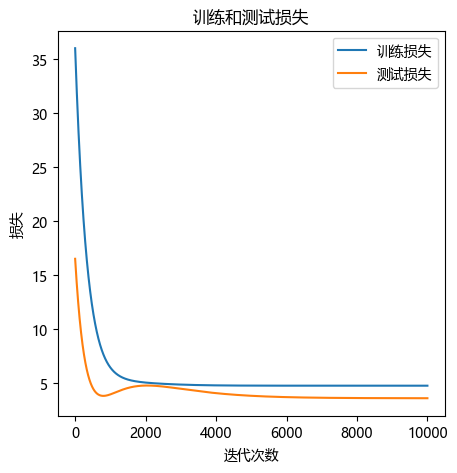

In [24]:
#根据W_his保留下的W值算出testset的损失值
y_test1=y_test.values
test_loss=[]
train_loss=[]
for i in W_his:
    loss=computeCost(normalized_X_test,y_test1,i,0.001)
    test_loss.append(loss)

for i in W_his:
    loss=computeCost(normalized_X_train,y_train,i,0.001)
    train_loss.append(loss)
    
plt.figure(figsize=(5,5)) 
# 可视化损失随迭代次数的变化
plt.plot(range(iters),train_loss, label='训练损失')
plt.plot(range(iters), test_loss, label='测试损失')
plt.xlabel('迭代次数')
plt.ylabel('损失')
plt.title('训练和测试损失')
plt.legend()
plt.show()
